In [71]:
import numpy as np  
import pandas as pd  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report
import xgboost as xgb  


In [86]:
import numpy as np

train_file = "D:\\cd_data_C\\Desktop\\Lab_Python\\Lab 2\\public_data\\train\\train.npz"

# Loads the training data from the .npz file.
train_data = np.load(train_file)

# Extracts the features from the training data.
X = train_data['X_train'][:-250]

# Extracts the labels from the training data.
y = train_data['y_train'][:-250]

# Split data into training and test sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [87]:
print(X_train.shape, y_train.shape)

(440, 100) (440,)


In [52]:
# Create a dictionary for models and their corresponding parameter grids  
models = {  
    # 'Logistic Regression': (LogisticRegression(random_state=42, max_iter=200), {  
    #     'classifier__C': [0.01, 0.1, 1, 10, 100],  
    #     'classifier__solver': ['lbfgs', 'liblinear']  
    # }),  
    'KNN': (KNeighborsClassifier(), {  
        'classifier__n_neighbors': [1, 3, 5, 7, 9, 11],  
        'classifier__weights': ['uniform', 'distance']  
    }),  
    # 'SVM': (SVC(random_state=42), {  
    #     'classifier__C': [0.1, 1, 10],  
    #     'classifier__kernel': ['linear', 'rbf', 'poly']  
    # }),  
    # 'Random Forest': (RandomForestClassifier(random_state=42), {  
    #     'classifier__n_estimators': [10, 50, 100, 200, 300, 400, 500],  
    #     'classifier__max_depth': [None, 10, 20, 30]  
    # })  
    # 'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), {  
    #     'classifier__max_depth': [3, 5, 7],  
    #     'classifier__n_estimators': [100, 200],  
    #     'classifier__learning_rate': [0.01, 0.1, 0.3]  
    # })  
}  

In [53]:
from sklearn.decomposition import PCA
from tqdm import tqdm as TQDM
# Create a list to store results  
results = []  

# Iterate through each model and perform GridSearchCV  
for model_name, (model, param_grid) in TQDM(models.items()):  
    # Define a pipeline with scaling and the classifier  
    pipeline = Pipeline([  
        ('pca', PCA(random_state=42)),  # Preprocessing step  
        ('classifier', model)  # The classifier  
    ])  
    
    # Set up param_grid to include PCA parameters  
    full_param_grid = {  
        'pca__n_components': [(0.9 + x/100) for x in range(1, 10)],  # Adjust the number of components as per your dataset  
        **param_grid  # Unpacking the model's parameter grid  
    }  
    
    # Set up GridSearchCV  
    grid_search = GridSearchCV(estimator=pipeline,  
                               param_grid=full_param_grid,  
                               scoring='accuracy',  
                               n_jobs=-1,  
                               cv=4)  

    # Fit GridSearchCV  
    grid_search.fit(X_train, y_train)  

    # Append results  
    results.append({  
        'model': model_name,  
        'best_params': grid_search.best_params_,  
        'best_score': grid_search.best_score_,  
        'best_estimator': grid_search.best_estimator_  
    })  

100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


In [54]:
# Display results  
for i, result in enumerate(results):  
    print(f"Model: {result['model']}")  
    print(f"Best Parameters: {result['best_params']}")  
    print(f"Best Cross-Validation Score: {result['best_score']:.4f}\n")  
    
    # To evaluate the  

    # Overall best model (if desired)  
    # best_model = max(results, key=lambda x: x['best_score']) 
    best_model = results[i] 

    # Test on the test set  
    y_pred = best_model['best_estimator'].predict(X_test)  
    print(f"Test Set Classification Report for {best_model['model']}:\n", classification_report(y_test, y_pred))

Model: KNN
Best Parameters: {'classifier__n_neighbors': 11, 'classifier__weights': 'uniform', 'pca__n_components': 0.96}
Best Cross-Validation Score: 0.9328

Test Set Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94        80
           1       0.95      0.94      0.94        80

    accuracy                           0.94       160
   macro avg       0.94      0.94      0.94       160
weighted avg       0.94      0.94      0.94       160



In [49]:
best_model = max(results, key=lambda x: x['best_score']) 
# best_model = results[i] 

# Test on the test set  
y_pred = best_model['best_estimator'].predict(X_test)  
print(f"Test Set Classification Report for {best_model['model']}:\n", classification_report(y_test, y_pred))

Test Set Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        58
           1       0.93      0.77      0.84        52

    accuracy                           0.86       110
   macro avg       0.88      0.86      0.86       110
weighted avg       0.87      0.86      0.86       110



In [11]:
import numpy as np  
import pandas as pd  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.ensemble import RandomForestClassifier  

# Load the Iris dataset  
data = load_iris()  
X = data.data  # Features  
y = data.target  # Target variable  

# Split the dataset into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Define the model  
model = RandomForestClassifier(random_state=42)  

# Define the parameter grid  
param_grid = {  
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10]  
}  

# Create the GridSearchCV object  
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')  

# Fit the model with Grid Search  
grid_search.fit(X_train, y_train)  

# Print all results from the grid search  
results = pd.DataFrame(grid_search.cv_results_)  
print(results)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
    mean_fit_time  std_fit_time  mean_score_time  std_score_time   
0        0.069598      0.004276         0.004009        0.000015  \
1        0.113385      0.006344         0.006009        0.000017   
2        0.162552      0.002733         0.009394        0.000494   
3        0.055879      0.002580         0.003437        0.000452   
4        0.106784      0.001928         0.005814        0.000406   
5        0.155523      0.002658         0.008801        0.000397   
6        0.052600      0.001355         0.003000        0.000005   
7        0.104196      0.001167         0.005596        0.000496   
8        0.154882      0.001562         0.009005        0.000006   
9        0.052823      0.000728         0.003176        0.000412   
10       0.115200      0.021588         0.006001        0.000632   
11       0.157793      0.002052         0.009013        0.000016   
12       0.052246      0.001701         0.004209      

In [12]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.069598,0.004276,0.004009,0.000015,None,2,50,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.958333,0.958333,0.833333,1.0,0.958333,0.941667,0.056519,22
1,0.113385,0.006344,0.006009,0.000017,None,2,100,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.958333,0.958333,0.833333,1.0,0.958333,0.941667,0.056519,22
2,0.162552,0.002733,0.009394,0.000494,None,2,150,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.958333,1.000000,0.833333,1.0,0.958333,0.950000,0.061237,1
3,0.055879,0.002580,0.003437,0.000452,None,5,50,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.958333,1.000000,0.833333,1.0,0.958333,0.950000,0.061237,1
4,0.106784,0.001928,0.005814,0.000406,None,5,100,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.958333,1.000000,0.833333,1.0,0.958333,0.950000,0.061237,1
5,0.155523,0.002658,0.008801,0.000397,None,5,150,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.958333,1.000000,0.833333,1.0,0.958333,0.950000,0.061237,1
6,0.052600,0.001355,0.003000,0.000005,None,10,50,"{'max_depth': None, 'min_samples_split': 10, '...",0.958333,1.000000,0.833333,1.0,0.958333,0.950000,0.061237,1
7,0.104196,0.001167,0.005596,0.000496,None,10,100,"{'max_depth': None, 'min_samples_split': 10, '...",0.958333,1.000000,0.833333,1.0,0.958333,0.950000,0.061237,1
8,0.154882,0.001562,0.009005,0.000006,None,10,150,"{'max_depth': None, 'min_samples_split': 10, '...",0.958333,1.000000,0.833333,1.0,0.958333,0.950000,0.061237,1
9,0.052823,0.000728,0.003176,0.000412,10,2,50,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.958333,0.958333,0.833333,1.0,0.958333,0.941667,0.056519,22


In [41]:
import argparse
import sys
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from joblib import dump, load
from sklearn.pipeline import Pipeline  
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split, GridSearchCV  


model_dir = "Model"
os.makedirs(model_dir, exist_ok=True)

# Instantiates the logistic regression model.
pipeline = Pipeline([  
    ('pca', PCA(random_state=42, n_components=0.96)),  # Preprocessing step  
    ('classifier', KNeighborsClassifier(n_neighbors=9, weights='uniform'))  # The classifier  
])  

# Fits the model to the training data.
pipeline.fit(X_train, y_train)

# Defines the path for saving the trained model.
model_path = os.path.join(model_dir, 'trained_model.joblib')

# Saves the trained model to the specified path.
dump(pipeline, model_path)

['Model\\trained_model.joblib']

In [43]:
# Specifies the path to the trained model.
model_path = os.path.join(model_dir, 'trained_model.joblib')

# Constructs the path to the test data file.
test_file = os.path.join("D:\\cd_data_C\\Desktop\\Lab_Python\\Lab 2\\public_data\\test", 'test.npz')

# Loads the trained model from file.
model = load(model_path)

# Loads the test data from the .npz file.
test_data = np.load(test_file)

# Extracts the features from the test data.
X_test = test_data['X_test']

model.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

In [88]:
import pandas as pd  
from sklearn.ensemble import RandomForestClassifier  

# Fit the model  
model = RandomForestClassifier()  
model.fit(X_train, y_train)  

# Get feature importances  
importances = model.feature_importances_  

# Create a DataFrame for visualization  
feature_importances = pd.DataFrame({'Feature': [x for x in range(0, 100)], 'Importance': importances})  
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)  

# Display feature importances  
print(feature_importances)

    Feature  Importance
30       30    0.050170
19       19    0.044325
84       84    0.039456
86       86    0.036832
41       41    0.033492
..      ...         ...
67       67    0.002398
43       43    0.002322
90       90    0.002188
69       69    0.002125
57       57    0.001983

[100 rows x 2 columns]


In [77]:
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LogisticRegression  

# Initialize the model  
model = LogisticRegression(max_iter=200)  

# Initialize RFE  
selector = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features  
selector = selector.fit(X_train, y_train)  

# Get the selected features  
selected_features = X_train[selector.support_]  
print(selected_features)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 440 but corresponding boolean dimension is 100

In [89]:
from sklearn.linear_model import LogisticRegression  

# Fit the model  
model = LogisticRegression(max_iter=200)  
model.fit(X_train, y_train)  

# Get feature importances  
coefs = model.coef_[0]  
importance = pd.Series(coefs, index=[x for x in range(100)]).abs().sort_values(ascending=False)  

# Display feature importances  
print(importance)

12    0.597279
92    0.545415
15    0.502783
59    0.497937
96    0.474793
        ...   
47    0.012500
63    0.010583
46    0.008431
54    0.006465
87    0.006060
Length: 100, dtype: float64


In [91]:
from sklearn.feature_selection import SelectKBest, f_classif  

# Select top 5 features based on ANOVA F-statistic  
selector = SelectKBest(score_func=f_classif, k=10)  
X_new = selector.fit_transform(X_train, y_train)  

selected_features = selector.get_feature_names_out(input_features=[x for x in range(100)])  
print(selected_features)

[15 19 30 33 41 50 53 84 86 97]


In [93]:
from sklearn.linear_model import Lasso  

# Fit Lasso model  
model = Lasso(alpha=0.1)  
model.fit(X_train, y_train)  

# Get selected features  
important_features = np.where(model.coef_ != 0)[0]  
feature_names = [x for x in range(100)]
feature_names_selected = [feature_names[i] for i in important_features]  
print(feature_names_selected)
print(X_train.shape)

[9, 15, 51, 54, 56, 84, 87]
(440, 100)


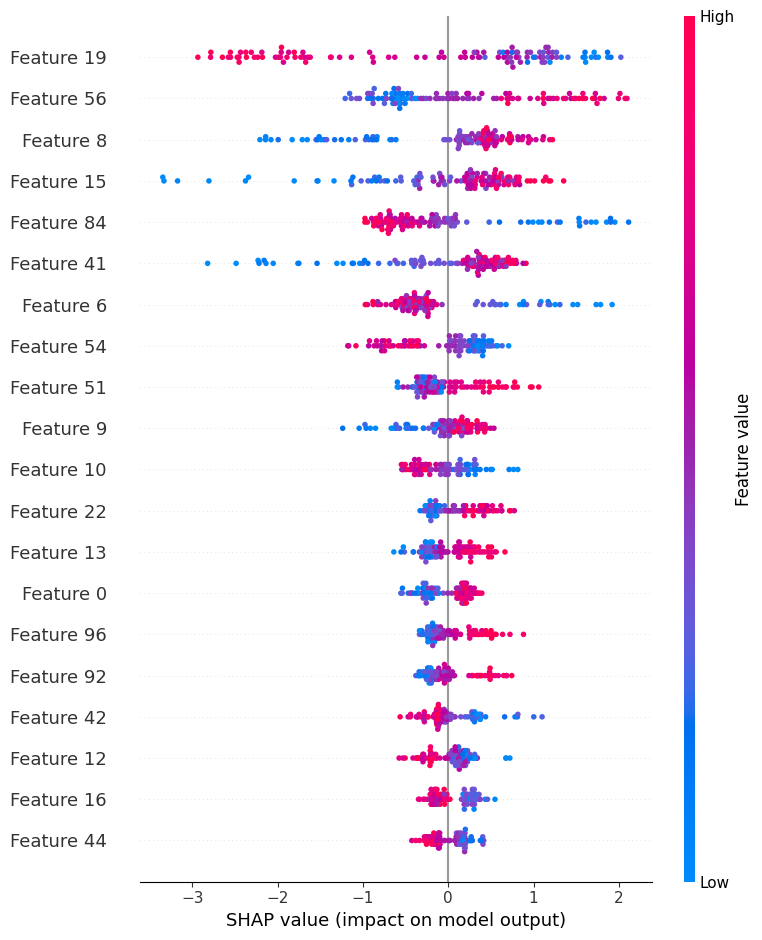

In [94]:
import shap  
from xgboost import XGBClassifier

# Fit model (can use any model)  
model = XGBClassifier()  
model.fit(X_train, y_train)  

# Explain predictions using SHAP  
explainer = shap.Explainer(model)  
shap_values = explainer(X_test)  

# Plot feature importance  
shap.summary_plot(shap_values, X_test)